# Auto Pedestrians Crashes Project

This project involves the exploration of a simple dataset about pedestrian crashes in the USA from 2010 to 2018

We will answer simple questions like : which year has the most pedestrian crashes ? what are the degrees of Injury ? how different it is for men vs women to be involved in these crashes ?

We wil start with importing the necessary libraries, getting acquainted with the data, clean it, do some exploratory data analysis and trying to answer the questions asked and we will wrap everything up with a conclusion

### 1 - Import the Data

Let's important the libraries first, and then put the dataset into a pandas dataframe

In [282]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ped_crashes = pd.read_csv('ped_crashes.csv')

### 2 - Exploratory Data Analysis

Now we do some exploratory data analysis

In [283]:
print(ped_crashes.head)

<bound method NDFrame.head of       Crash Year Crash Month  Crash Day            Time of Day Day of Week  \
0           2018    February          1     9:00 AM - 10:00 AM    Thursday   
1           2018    February          1      7:00 PM - 8:00 PM    Thursday   
2           2018    February          1  11:00 AM - 12:00 noon    Thursday   
3           2018    February          1      6:00 PM - 7:00 PM    Thursday   
4           2018       March          1      2:00 PM - 3:00 PM    Thursday   
...          ...         ...        ...                    ...         ...   
6804        2010        July         31      2:00 AM - 3:00 AM    Saturday   
6805        2010      August         31      2:00 PM - 3:00 PM     Tuesday   
6806        2010     October         31      8:00 PM - 9:00 PM      Sunday   
6807        2010    December         31      1:00 PM - 2:00 PM      Friday   
6808        2010    December         31    10:00 PM - 11:00 PM      Friday   

            City or Township     

In [284]:
print(ped_crashes.shape)

(6809, 15)


In [285]:
print(ped_crashes.columns)

Index(['Crash Year', 'Crash Month', 'Crash Day', 'Time of Day', 'Day of Week',
       'City or Township', 'Crash: Intersection', 'Crash: Hit-and-Run',
       'Lighting Conditions', 'Weather Conditions (2016+)',
       'Speed Limit at Crash Site', 'Worst Injury in Crash', 'Party Type',
       'Person Age', 'Person Gender'],
      dtype='object')


In [286]:
print(ped_crashes.dtypes)

Crash Year                     int64
Crash Month                   object
Crash Day                      int64
Time of Day                   object
Day of Week                   object
City or Township              object
Crash: Intersection           object
Crash: Hit-and-Run            object
Lighting Conditions           object
Weather Conditions (2016+)    object
Speed Limit at Crash Site     object
Worst Injury in Crash         object
Party Type                    object
Person Age                    object
Person Gender                 object
dtype: object


it appears some columns aren't in the right Datatype, let's fix that

In [287]:
print(ped_crashes['Speed Limit at Crash Site'].unique())

['35' '30' '25' '45' '15' 'Uncoded & errors' '40' '20' '55' '5' '70' '50'
 '10' '65' '60']


In [288]:
ped_crashes['Speed Limit at Crash Site'] = ped_crashes['Speed Limit at Crash Site'].str.replace('Uncoded & errors', '-1')
ped_crashes['Speed Limit at Crash Site'] = ped_crashes['Speed Limit at Crash Site'].astype('int')
print(ped_crashes['Speed Limit at Crash Site'].unique())

[35 30 25 45 15 -1 40 20 55  5 70 50 10 65 60]


In [289]:
print(ped_crashes['Person Age'].unique())

['DOB invalid' '44' '27' '22' '18' '20' '47' '50' '51' '36' '17' '31' '53'
 '21' '69' '52' '26' '58' '59' '35' '78' '63' '60' '70' '33' '73' '57'
 '46' '61' '41' '29' '76' '86' '49' '19' '37' '30' '28' '45' '48' '23'
 '40' '25' '56' '24' '89' '55' '43' '54' '62' '38' '64' '42' '66' '74'
 '11' '34' '65' '32' '39' '81' '77' '71' '67' '80' '68' '85' '7' '82' '84'
 'Less than 1 year old' '75' '72' '16' '79' '91' '88' '15' '87' '83' '95'
 '93' '14' '4' '90' '12' '92']


In [290]:
ped_crashes['Person Age'] = ped_crashes['Person Age'].str.replace('DOB invalid', '-1')
ped_crashes['Person Age'] = ped_crashes['Person Age'].str.replace('Less than 1 year old', '0')
ped_crashes['Person Age'] = ped_crashes['Person Age'].astype('int')
print(ped_crashes['Person Age'].unique())


[-1 44 27 22 18 20 47 50 51 36 17 31 53 21 69 52 26 58 59 35 78 63 60 70
 33 73 57 46 61 41 29 76 86 49 19 37 30 28 45 48 23 40 25 56 24 89 55 43
 54 62 38 64 42 66 74 11 34 65 32 39 81 77 71 67 80 68 85  7 82 84  0 75
 72 16 79 91 88 15 87 83 95 93 14  4 90 12 92]


In [291]:
print(ped_crashes.dtypes)

Crash Year                     int64
Crash Month                   object
Crash Day                      int64
Time of Day                   object
Day of Week                   object
City or Township              object
Crash: Intersection           object
Crash: Hit-and-Run            object
Lighting Conditions           object
Weather Conditions (2016+)    object
Speed Limit at Crash Site      int32
Worst Injury in Crash         object
Party Type                    object
Person Age                     int32
Person Gender                 object
dtype: object


Now it's all good, we will next check for missing values and duplicates

In [292]:
print(ped_crashes.isna().sum())

Crash Year                    0
Crash Month                   0
Crash Day                     0
Time of Day                   0
Day of Week                   0
City or Township              0
Crash: Intersection           0
Crash: Hit-and-Run            0
Lighting Conditions           0
Weather Conditions (2016+)    0
Speed Limit at Crash Site     0
Worst Injury in Crash         0
Party Type                    0
Person Age                    0
Person Gender                 0
dtype: int64


In [293]:
ped_crashes_duplicates = ped_crashes.duplicated()
print(ped_crashes_duplicates.value_counts())

False    6809
dtype: int64


All good, so we start the analysis

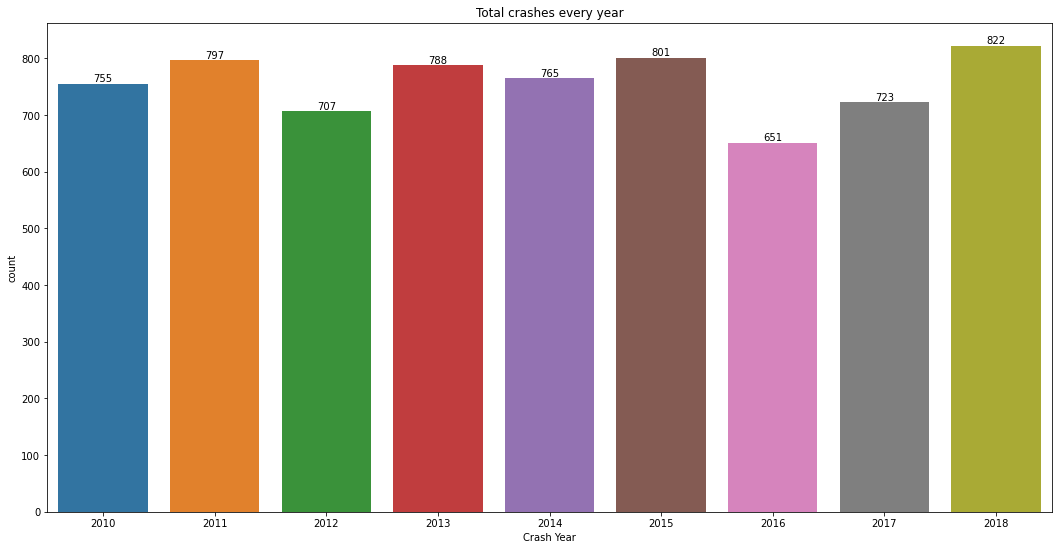

<Figure size 432x288 with 0 Axes>

In [294]:
plt.figure(figsize=(18, 9))
ax = sns.countplot(x='Crash Year', data=ped_crashes)
ax.bar_label(ax.containers[0])
plt.title("Total crashes every year")
plt.show()
plt.clf()

It seems that there isn't much difference between the total crashes every year, with 2016 being the year with the least crashes and 2018 with the most, but not by much

In [295]:
print(ped_crashes['Crash Month'].value_counts())

October      695
September    647
November     625
December     604
June         586
May          580
January      559
March        542
July         531
August       512
February     482
April        446
Name: Crash Month, dtype: int64


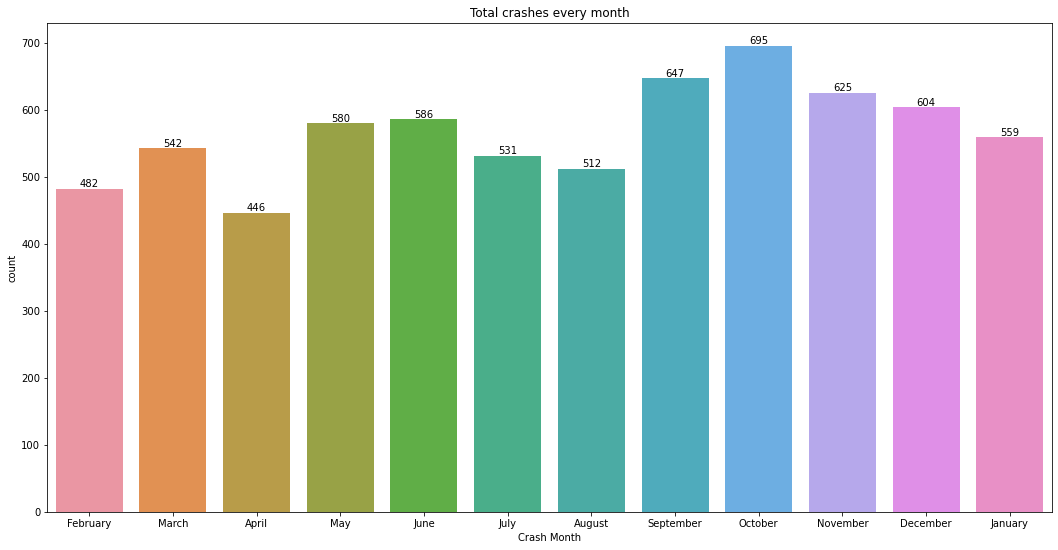

<Figure size 432x288 with 0 Axes>

In [296]:
plt.figure(figsize=(18, 9))
ax = sns.countplot(x='Crash Month', data=ped_crashes)
ax.bar_label(ax.containers[0])
plt.title("Total crashes every month")
plt.show()
plt.clf()

The same can be seem for the months, although the second half of the year seem to have a bit more crashes than the first half, especially in October for the second half half ,as well as April for the first half

In [297]:
print(ped_crashes['Crash Day'].value_counts())

16    255
9     252
14    249
11    248
21    246
17    242
1     241
6     239
3     238
23    232
25    231
12    230
20    229
24    229
2     229
7     228
8     228
18    224
4     221
19    212
13    212
5     211
30    210
15    209
10    204
28    203
22    202
26    180
27    180
29    174
31    121
Name: Crash Day, dtype: int64


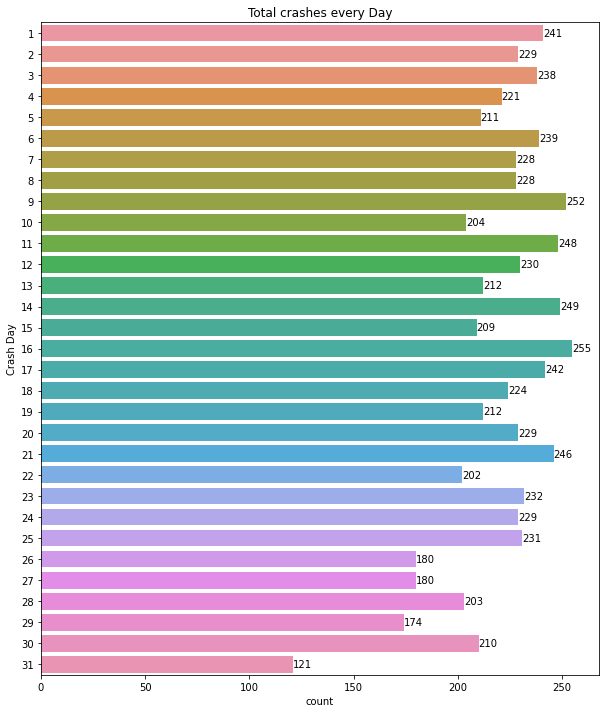

<Figure size 432x288 with 0 Axes>

In [298]:
plt.figure(figsize=(10, 12))
ax = sns.countplot(y='Crash Day', data=ped_crashes)
ax.bar_label(ax.containers[0])
plt.title("Total crashes every Day")
plt.show()
plt.clf()

Not much different in the number of crashes during the days of the month

In [299]:
print(ped_crashes['Time of Day'].value_counts())

6:00 PM - 7:00 PM            535
7:00 PM - 8:00 PM            498
5:00 PM - 6:00 PM            491
3:00 PM - 4:00 PM            461
4:00 PM - 5:00 PM            452
8:00 PM - 9:00 PM            439
9:00 PM - 10:00 PM           353
2:00 PM - 3:00 PM            342
10:00 PM - 11:00 PM          336
7:00 AM - 8:00 AM            314
11:00 PM - 12:00 midnight    289
12:00 noon - 1:00 PM         273
1:00 PM - 2:00 PM            270
8:00 AM - 9:00 AM            233
11:00 AM - 12:00 noon        231
10:00 AM - 11:00 AM          195
2:00 AM - 3:00 AM            184
12:00 midnight - 1:00 AM     177
9:00 AM - 10:00 AM           165
1:00 AM - 2:00 AM            159
6:00 AM - 7:00 AM            147
5:00 AM - 6:00 AM             93
3:00 AM - 4:00 AM             89
4:00 AM - 5:00 AM             77
Unknown                        6
Name: Time of Day, dtype: int64


In [300]:
time = []
for x in ped_crashes['Time of Day']:
    i = x.split('-')
    if 'AM' in i[0]:
        time.append(i[0].split(':')[0])
    elif 'PM' in i[0]:
        time.append(int(i[0].split(':')[0])+12)
    elif 'noon' in i[0]:
        time.append(i[0].split(':')[0])
    elif 'midnight' in i[0]:
        time.append(int(i[0].split(':')[0])+12)
    else:
        time.append(-1)

ped_crashes['Time'] = time
ped_crashes['Time'] = ped_crashes['Time'].astype('int')
print(ped_crashes.dtypes)

Crash Year                     int64
Crash Month                   object
Crash Day                      int64
Time of Day                   object
Day of Week                   object
City or Township              object
Crash: Intersection           object
Crash: Hit-and-Run            object
Lighting Conditions           object
Weather Conditions (2016+)    object
Speed Limit at Crash Site      int32
Worst Injury in Crash         object
Party Type                    object
Person Age                     int32
Person Gender                 object
Time                           int32
dtype: object


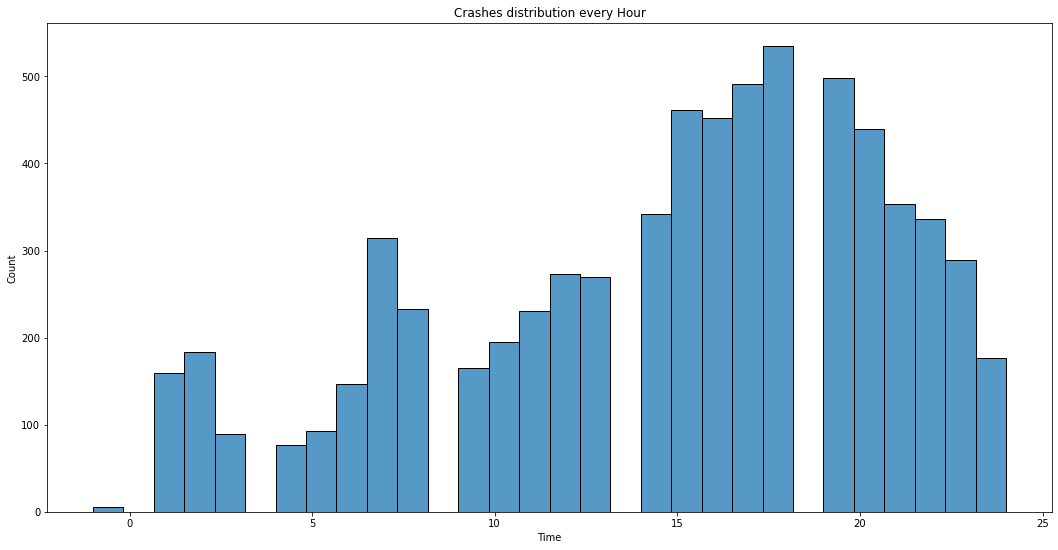

<Figure size 432x288 with 0 Axes>

In [301]:
plt.figure(figsize=(18, 9))
sns.histplot(x='Time', data=ped_crashes)
plt.title("Crashes distribution every Hour")
plt.show()
plt.clf()

Crashes appear to happen more between 15h and midnight, and less in the morning

In [302]:
print(ped_crashes['Day of Week'].value_counts())

Friday       1078
Thursday     1028
Tuesday      1021
Saturday      990
Wednesday     977
Monday        959
Sunday        756
Name: Day of Week, dtype: int64


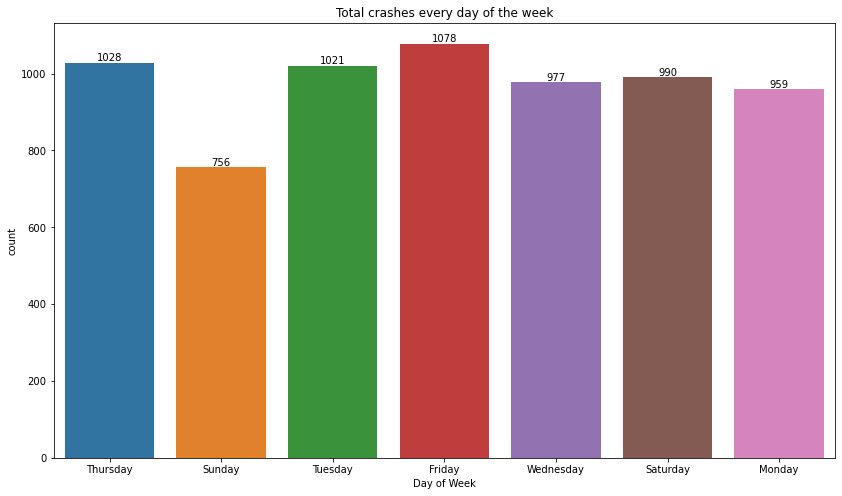

<Figure size 432x288 with 0 Axes>

In [303]:
plt.figure(figsize=(14, 8))
ax = sns.countplot(x='Day of Week', data=ped_crashes)
ax.bar_label(ax.containers[0])
plt.title("Total crashes every day of the week")
plt.show()
plt.clf()

Not much difference in the crashes happening during the days of the week except for Sunday where it has less crashes

In [304]:
print(ped_crashes['City or Township'].unique())

['Wayne County: Detroit' 'Wayne County: Southgate'
 'Wayne County: Belleville' 'Wayne County: Inkster'
 'Wayne County: Livonia' 'Wayne County: Wyandotte'
 'Wayne County: Dearborn' 'Wayne County: Northville'
 'Wayne County: Hamtramck' 'Wayne County: Redford Twp.'
 'Wayne County: Van Buren Twp.' 'Wayne County: Plymouth Twp.'
 'Wayne County: Lincoln Park' 'Wayne County: Grosse Pointe'
 'Wayne County: Grosse Pointe Park' 'Wayne County: Dearborn Heights'
 'Wayne County: Taylor' 'Wayne County: Allen Park'
 'Wayne County: Garden City' 'Wayne County: Romulus'
 'Wayne County: Highland Park' 'Wayne County: Westland'
 'Wayne County: Northville Twp.' 'Wayne County: Grosse Pointe Woods'
 'Wayne County: Harper Woods' 'Wayne County: Canton Twp.'
 'Wayne County: Wood Haven' 'Wayne County: Brownstown Twp.'
 'Wayne County: Huron Twp.' 'Wayne County: Wayne' 'Wayne County: Plymouth'
 'Wayne County: Ecorse' 'Wayne County: Trenton' 'Wayne County: Melvindale'
 'Wayne County: Sumpter Twp.' 'Wayne County: Gros

In [305]:
print(ped_crashes['City or Township'].value_counts())

Wayne County: Detroit                 4543
Wayne County: Dearborn                 349
Wayne County: Westland                 168
Wayne County: Hamtramck                165
Wayne County: Taylor                   161
Wayne County: Dearborn Heights         131
Wayne County: Redford Twp.             128
Wayne County: Livonia                  118
Wayne County: Lincoln Park             108
Wayne County: Canton Twp.              101
Wayne County: Romulus                   80
Wayne County: Highland Park             79
Wayne County: Inkster                   59
Wayne County: Southgate                 58
Wayne County: Brownstown Twp.           52
Wayne County: Wayne                     48
Wayne County: Wyandotte                 45
Wayne County: Garden City               42
Wayne County: Plymouth Twp.             40
Wayne County: Allen Park                32
Wayne County: Van Buren Twp.            30
Wayne County: Harper Woods              30
Wayne County: Plymouth                  22
Wayne Count

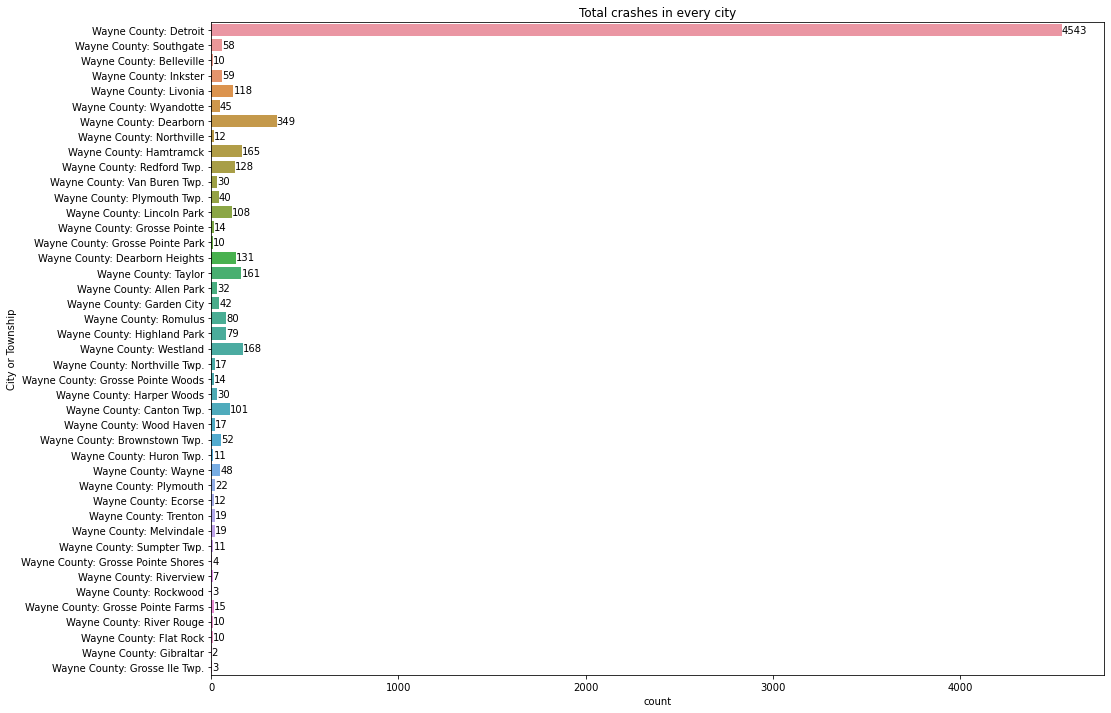

<Figure size 432x288 with 0 Axes>

In [306]:
plt.figure(figsize=(16, 12))
ax = sns.countplot(y='City or Township', data=ped_crashes)
ax.bar_label(ax.containers[0])
plt.title("Total crashes in every city")
plt.show()
plt.clf()

Most of the crashes happens in Detroit

In [307]:
print(ped_crashes['Crash: Intersection'].unique())

['Not intersection crash' 'Intersection crash']


In [308]:
print(ped_crashes['Crash: Intersection'].value_counts())

Not intersection crash    3852
Intersection crash        2957
Name: Crash: Intersection, dtype: int64


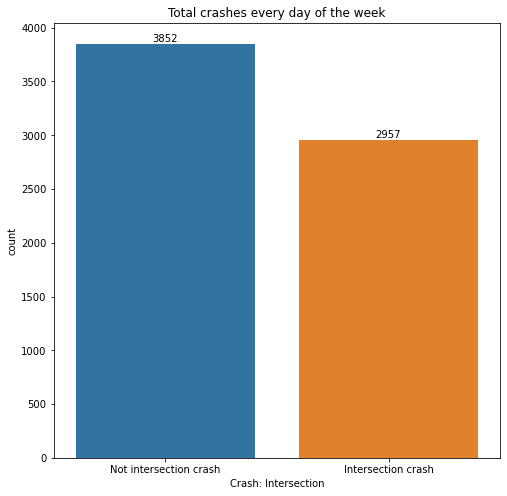

<Figure size 432x288 with 0 Axes>

In [345]:
plt.figure(figsize=(8, 8))
ax = sns.countplot(x='Crash: Intersection', data=ped_crashes)
ax.bar_label(ax.containers[0])
plt.title("Crash intersection")
plt.show()
plt.clf()

We have more non-intersection crashes

In [309]:
print(ped_crashes['Crash: Hit-and-Run'].unique())

['Hit-and-run' 'Not hit-and-run']


In [310]:
print(ped_crashes['Crash: Hit-and-Run'].value_counts())

Not hit-and-run    4300
Hit-and-run        2509
Name: Crash: Hit-and-Run, dtype: int64


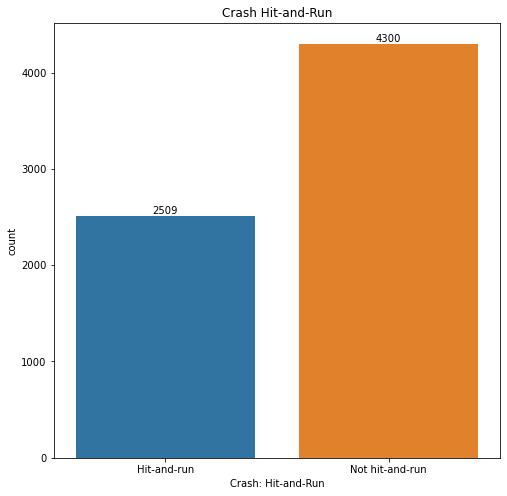

<Figure size 432x288 with 0 Axes>

In [346]:
plt.figure(figsize=(8, 8))
ax = sns.countplot(x='Crash: Hit-and-Run', data=ped_crashes)
ax.bar_label(ax.containers[0])
plt.title("Crash Hit-and-Run")
plt.show()
plt.clf()

We have a lot more non-Hit-and-run crashes

In [311]:
print(ped_crashes['Lighting Conditions'].unique())

['Daylight' 'Dark lighted' 'Dusk' 'Dark unlighted' 'Unknown' 'Dawn'
 'Other / unknown' 'Uncoded & errors']


In [312]:
print(ped_crashes['Lighting Conditions'].value_counts())

Daylight            3630
Dark lighted        2066
Dark unlighted       748
Dusk                 177
Dawn                 131
Other / unknown       31
Unknown               24
Uncoded & errors       2
Name: Lighting Conditions, dtype: int64


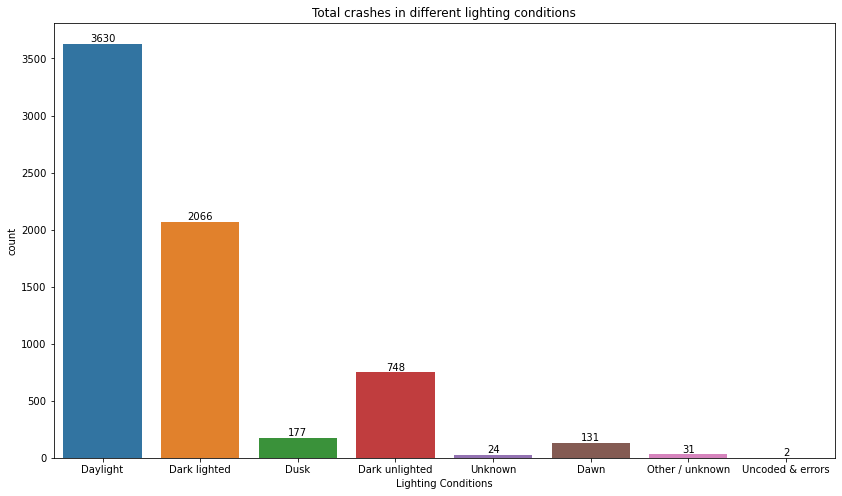

<Figure size 432x288 with 0 Axes>

In [313]:
plt.figure(figsize=(14, 8))
ax = sns.countplot(x='Lighting Conditions', data=ped_crashes)
ax.bar_label(ax.containers[0])
plt.title("Total crashes in different lighting conditions")
plt.show()
plt.clf()

The majority of crashes happen during Daylight

In [314]:
print(ped_crashes['Weather Conditions (2016+)'].unique())

['Clear' 'Cloudy' 'Snow' 'Rain' 'Unknown' 'Smoke' 'Sleet/hail' 'Fog'
 'Blowing snow' 'Uncoded & errors']


In [315]:
print(ped_crashes['Weather Conditions (2016+)'].value_counts())

Uncoded & errors    4613
Clear               1579
Cloudy               270
Rain                 253
Snow                  52
Unknown               32
Fog                    5
Sleet/hail             2
Blowing snow           2
Smoke                  1
Name: Weather Conditions (2016+), dtype: int64


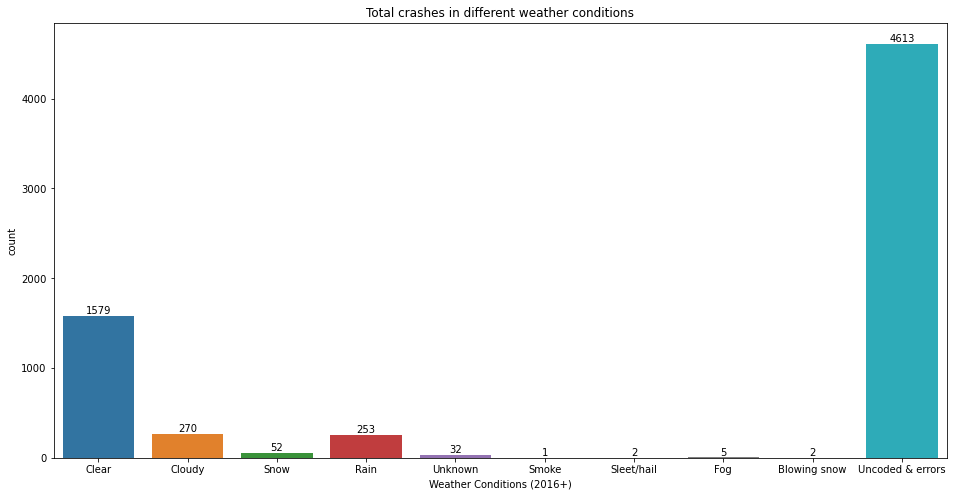

<Figure size 432x288 with 0 Axes>

In [357]:
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='Weather Conditions (2016+)', data=ped_crashes)
ax.bar_label(ax.containers[0])
plt.title("Total crashes in different weather conditions")
plt.show()
plt.clf()

For the different weather conditions the majority are Uncoded, but from the ones that were coded, the Clear weather has the highest amount of crashes, but this might've been different if we didn't have a large uncoded values

In [317]:
print(ped_crashes['Speed Limit at Crash Site'].value_counts())

 25    2233
 35    1661
 30    1211
 40     506
 45     396
-1      279
 55     164
 70     159
 15      84
 50      40
 20      37
 10      23
 5       10
 65       4
 60       2
Name: Speed Limit at Crash Site, dtype: int64


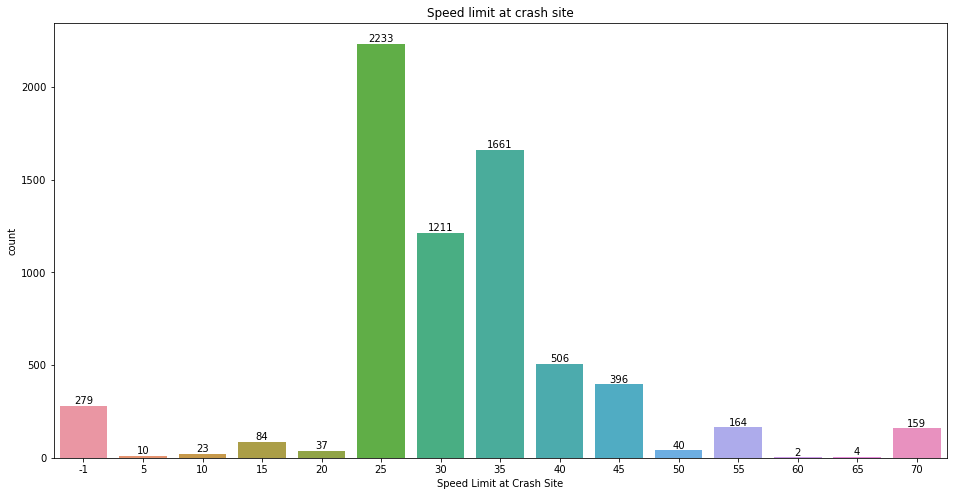

<Figure size 432x288 with 0 Axes>

In [318]:
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='Speed Limit at Crash Site', data=ped_crashes)
ax.bar_label(ax.containers[0])
plt.title("Speed limit at crash site")
plt.show()
plt.clf()

The majority of crashes happen between the speed limit of 25 to 35, with the speed limit of 40 to 45 coming second

In [319]:
print(ped_crashes['Worst Injury in Crash'].unique())

['Suspected minor injury (B)' 'Suspected serious injury (A)'
 'Possible injury (C)' 'No injury (O)' 'Fatal injury (K)']


In [320]:
print(ped_crashes['Worst Injury in Crash'].value_counts())

Possible injury (C)             2489
Suspected minor injury (B)      1730
Suspected serious injury (A)    1083
No injury (O)                    993
Fatal injury (K)                 514
Name: Worst Injury in Crash, dtype: int64


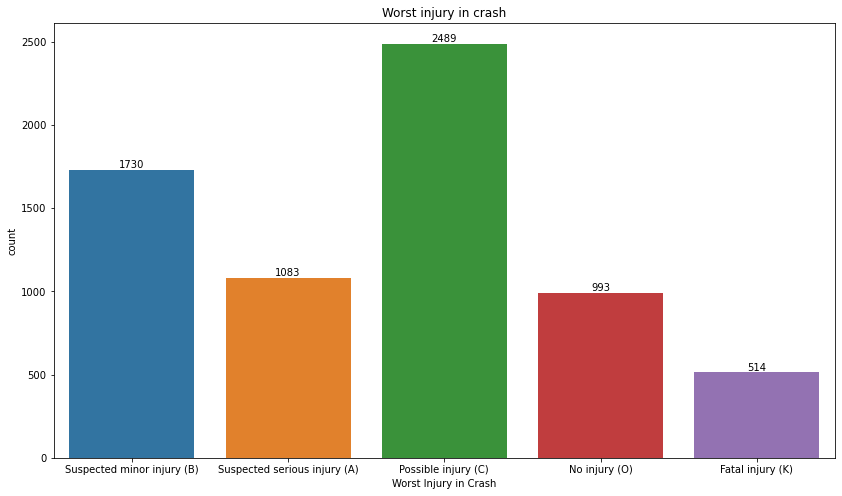

<Figure size 432x288 with 0 Axes>

In [321]:
plt.figure(figsize=(14, 8))
ax = sns.countplot(x='Worst Injury in Crash', data=ped_crashes)
ax.bar_label(ax.containers[0])
plt.title("Worst injury in crash")
plt.show()
plt.clf()

Most of pedestrians involved in crashes have been possibly injured

In [327]:
print(ped_crashes['Person Age'].value_counts())

-1     2470
 19     112
 20     111
 22     104
 23     103
       ... 
 93       2
 11       1
 4        1
 7        1
 92       1
Name: Person Age, Length: 87, dtype: int64


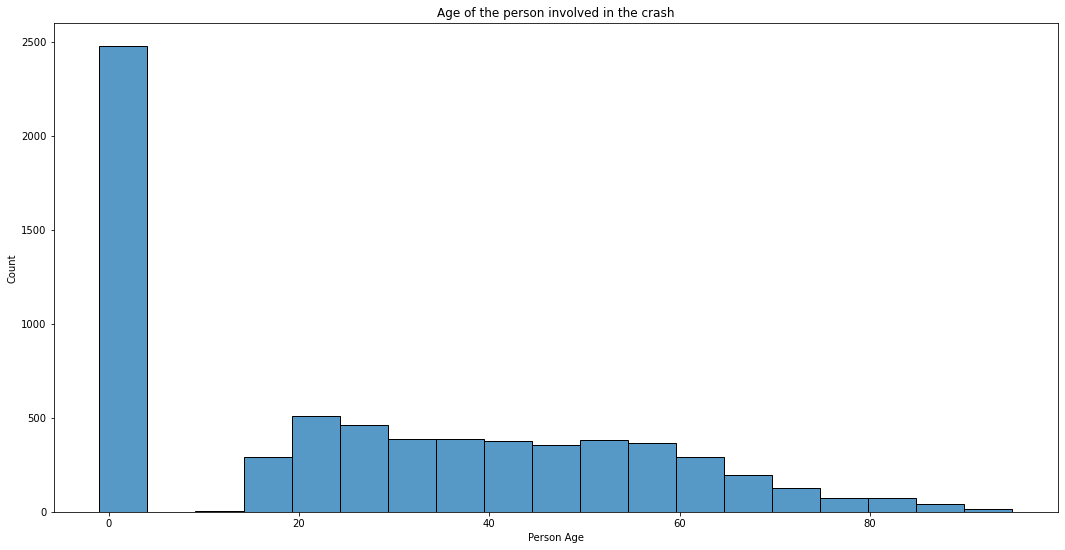

<Figure size 432x288 with 0 Axes>

In [340]:
plt.figure(figsize=(18, 9))
sns.histplot(x='Person Age', data=ped_crashes)
plt.title("Age of the person involved in the crash")
plt.show()
plt.clf()

We have a lot of invalid dates of birth in this dataset so we will remove that from the next plot to make it easier for us to check the visualization

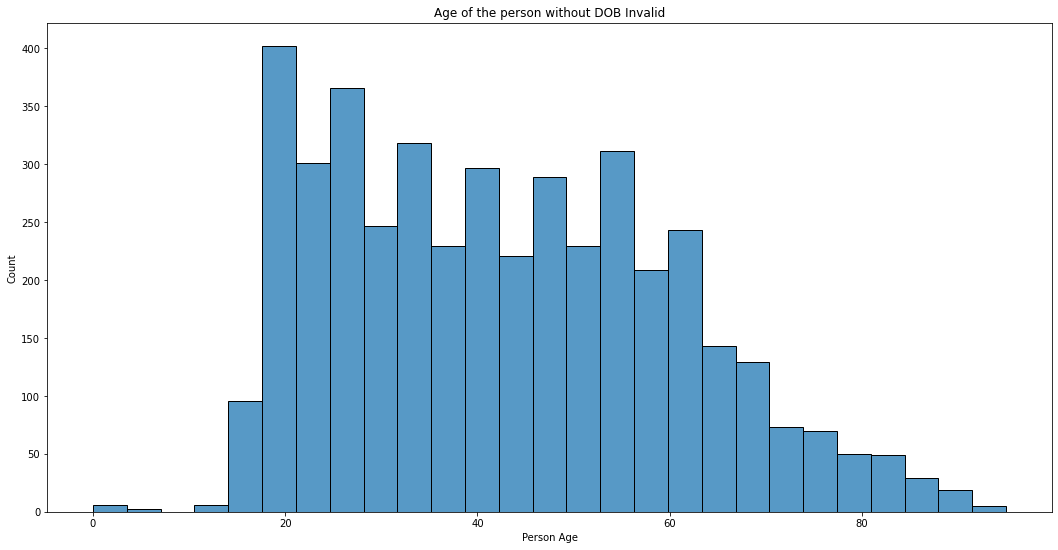

<Figure size 432x288 with 0 Axes>

In [336]:
age = ped_crashes[ped_crashes['Person Age'] != -1]

plt.figure(figsize=(18, 9))
sns.histplot(x='Person Age', data=age)
plt.title("Age of the person without DOB Invalid")
plt.show()
plt.clf()

There is a high number of pedestrians involved in crashes in their 20s which decrases the older the pedestrians are

In [333]:
print(ped_crashes['Person Gender'].value_counts())

Male                2905
Female              1993
Uncoded & errors    1911
Name: Person Gender, dtype: int64


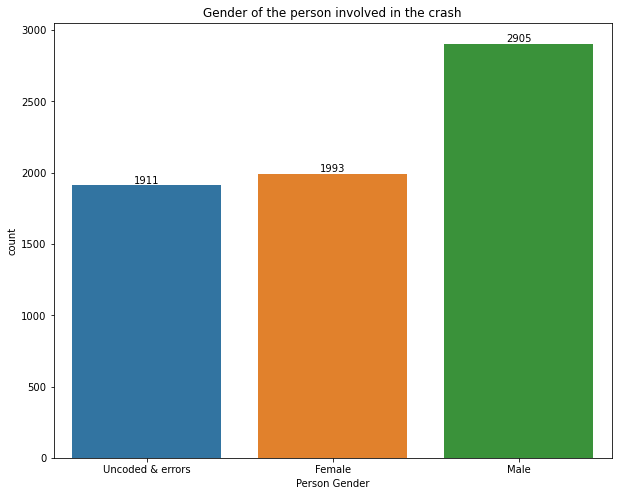

<Figure size 432x288 with 0 Axes>

In [339]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(x='Person Gender', data=ped_crashes)
ax.bar_label(ax.containers[0])
plt.title("Gender of the person involved in the crash")
plt.show()
plt.clf()

The number of Males is higher than that of the females but we also have a large number of uncoded values, nearly the same as the female so this might've made a difference if it was coded

### 3 - More Analysis

Now we go deep into the analysis, and we will check if being in an intersection or not will change the type of injury much, as well as being involved in a hit and run crashe or even being a male vs female

In [347]:
print(pd.crosstab(ped_crashes['Worst Injury in Crash'], ped_crashes['Crash: Intersection']))

Crash: Intersection           Intersection crash  Not intersection crash
Worst Injury in Crash                                                   
Fatal injury (K)                             151                     363
No injury (O)                                446                     547
Possible injury (C)                         1201                    1288
Suspected minor injury (B)                   751                     979
Suspected serious injury (A)                 408                     675


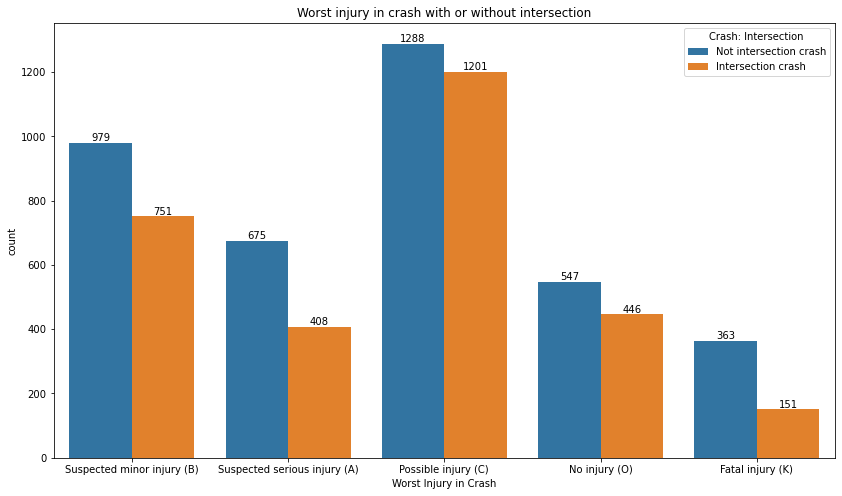

<Figure size 432x288 with 0 Axes>

In [360]:
plt.figure(figsize=(14, 8))
ax = sns.countplot(x='Worst Injury in Crash', hue='Crash: Intersection', data=ped_crashes)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Worst injury in crash with or without intersection")
plt.show()
plt.clf()

The number of intersection crashes is usually lower than those not in intersection crashes, sometimes by a small amount in case of the possible injury and sometimes by a large amount in case of the Fatal injury

In [355]:
print(pd.crosstab(ped_crashes['Worst Injury in Crash'], ped_crashes['Crash: Hit-and-Run']))

Crash: Hit-and-Run            Hit-and-run  Not hit-and-run
Worst Injury in Crash                                     
Fatal injury (K)                      194              320
No injury (O)                         428              565
Possible injury (C)                   920             1569
Suspected minor injury (B)            606             1124
Suspected serious injury (A)          361              722


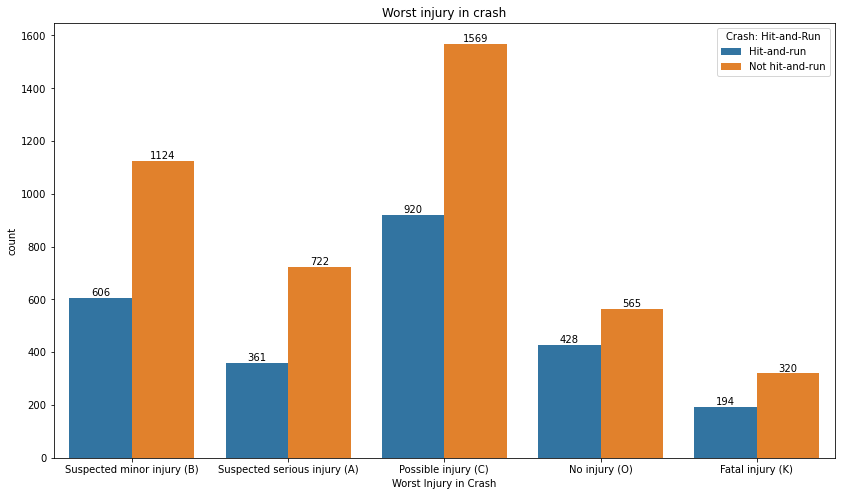

<Figure size 432x288 with 0 Axes>

In [356]:
plt.figure(figsize=(14, 8))
ax = sns.countplot(x='Worst Injury in Crash', hue='Crash: Hit-and-Run', data=ped_crashes)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Worst injury in crash with or without Hit-and-Run")
plt.show()
plt.clf()

The number of hit and run crashes is lower than those not hit and run, no matter the injury type

In [358]:
print(pd.crosstab(ped_crashes['Worst Injury in Crash'], ped_crashes['Person Gender']))

Person Gender                 Female  Male  Uncoded & errors
Worst Injury in Crash                                       
Fatal injury (K)                 127   246               141
No injury (O)                    273   382               338
Possible injury (C)              745  1069               675
Suspected minor injury (B)       556   703               471
Suspected serious injury (A)     292   505               286


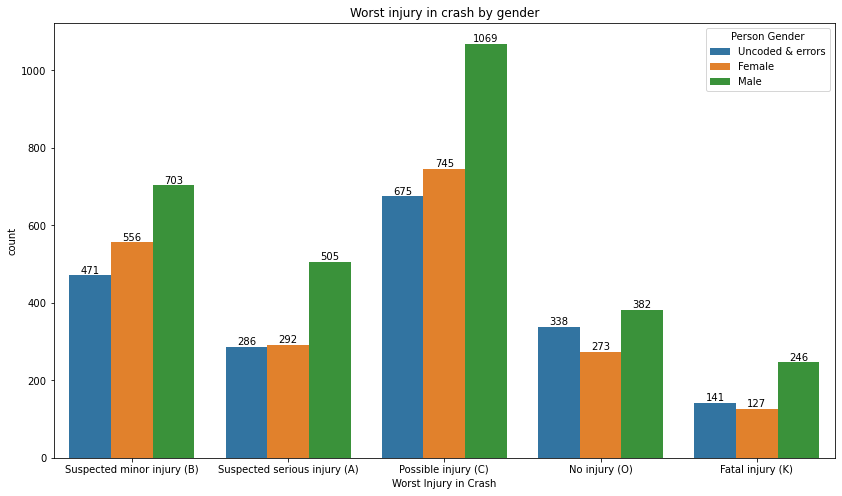

<Figure size 432x288 with 0 Axes>

In [361]:
plt.figure(figsize=(14, 8))
ax = sns.countplot(x='Worst Injury in Crash', hue='Person Gender', data=ped_crashes)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.title("Worst injury in crash by gender")
plt.show()
plt.clf()

The number of males is always higher regardless of the injury type with the number of females is close to the uncoded values

In [362]:
print(pd.crosstab(ped_crashes['Person Gender'], ped_crashes['Crash: Intersection']))

Crash: Intersection  Intersection crash  Not intersection crash
Person Gender                                                  
Female                              916                    1077
Male                               1256                    1649
Uncoded & errors                    785                    1126


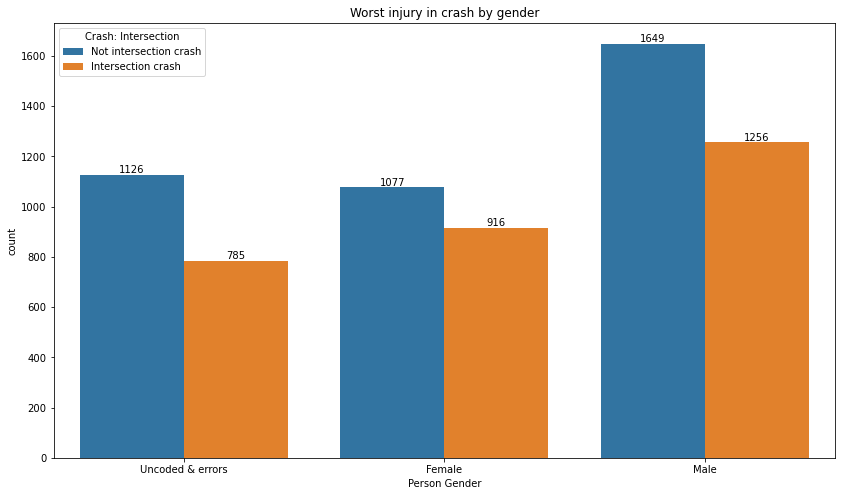

<Figure size 432x288 with 0 Axes>

In [365]:
plt.figure(figsize=(14, 8))
ax = sns.countplot(x='Person Gender', hue='Crash: Intersection', data=ped_crashes)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Worst injury in crash by gender")
plt.show()
plt.clf()

The intersection crashes are lower than the not intersection crashes regardless of the gender

In [366]:
print(pd.crosstab(ped_crashes['Person Gender'], ped_crashes['Crash: Hit-and-Run']))

Crash: Hit-and-Run  Hit-and-run  Not hit-and-run
Person Gender                                   
Female                      280             1713
Male                        593             2312
Uncoded & errors           1636              275


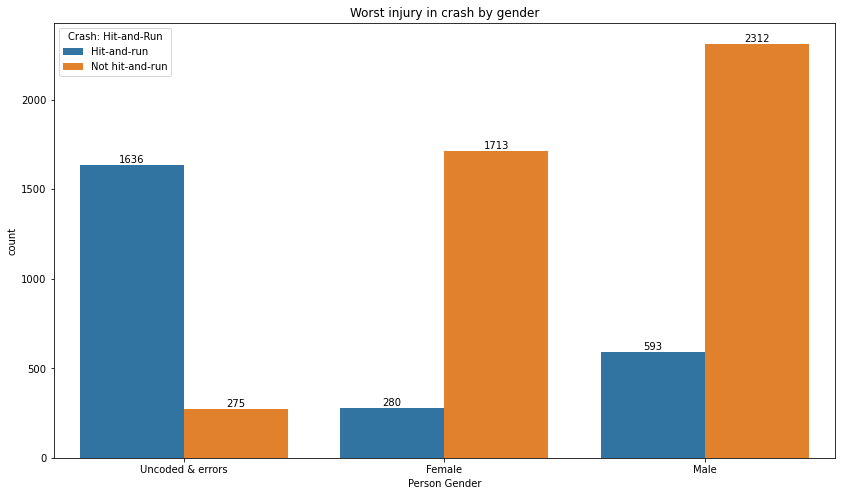

<Figure size 432x288 with 0 Axes>

In [367]:
plt.figure(figsize=(14, 8))
ax = sns.countplot(x='Person Gender', hue='Crash: Hit-and-Run', data=ped_crashes)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Worst injury in crash by gender")
plt.show()
plt.clf()

For males and females, the Hit and run crashes are much lower compared to the non hit and run ones, except for the uncoded values where it's the complete opposite, the Hit and run crashes are much higher

### 4 - Conclusion

From this small and simple data we saw that number of crashes was quite similair during the years from 2010 to 2018, regardless of the month or the day of the month or the day with the week, with some small exceptions, like Sunday having less crashes or april having less and October having more, but it's too small to be significant

Usually males are involved in more crashes than females but we also have a large number of uncoded values, it would've been better if we had more data about the males and females

Most pedestrians involved in the crashes were injured, with some having minor injury and a small amount having Fatal injury

Whether the crashes happend at an intersection or whether it was hit and run didn't matter too much, the difference was too small

Surprisingly most crashes happend at a "not very high" speed limit, so speeding isn't always the biggest factor in crashes

The majority of crashes happened in broad daylight with the weather being clear, although we have a huge amount of uncoded values for the weather so that might've been different if we had more values to work with

The county of Detroit had the most crashes with more than 4500 pedestrian crash betwee 2010 and 2018

I suggest we get more data to work with to make the analysis more robust and more precise, with less uncoded values